In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


<h2> Dataset 2

In [4]:
dt2=pd.read_csv("./cardio_train.csv",delimiter=';')
dt2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:

dt2.drop(columns=["id"],inplace=True)



In [6]:
dt2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
dt2.columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active','target']

dt2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Dataset Description

1. <span style="color:red">**age**</span>: 
   - Age of the individual in days.

2. <span style="color:red">**gender**</span>: 
   - Categorical variable representing gender.
     - 1: Women
     - 2: Men

3. <span style="color:red">**height**</span>: 
   - Height of the individual in centimeters (cm).

4. <span style="color:red">**weight**</span>: 
   - Weight of the individual in kilograms (kg).

5. <span style="color:red">**ap_hi**</span>: 
   - Systolic blood pressure, measured in millimeters of mercury (mmHg).
   - **Normal range:** (90-120 mmHg)

6. <span style="color:red">**ap_lo**</span>: 
   - Diastolic blood pressure, measured in millimeters of mercury (mmHg).
   - **Normal range:** (60-80 mmHg)

7. <span style="color:red">**cholesterol**</span>: 
   - Categorical variable representing cholesterol level.
     - 1: Normal
     - 2: Above Normal
     - 3: Well Above Normal

8. <span style="color:red">**gluc**</span>: 
   - Categorical variable representing glucose level.
     - 1: Normal
     - 2: Above Normal
     - 3: Well Above Normal

9. <span style="color:red">**smoke**</span>: 
   - Binary variable indicating whether the individual smokes or not.
     - 0: Non-smoker
     - 1: Smoker

10. <span style="color:red">**alco**</span>: 
    - Binary variable indicating whether the individual consumes alcohol or not.
      - 0: Non-drinker
      - 1: Drinker

11. <span style="color:red">**active**</span>: 
    - Binary variable indicating whether the individual leads an active lifestyle or not.
      - 0: Inactive
      - 1: Active

12. <span style="color:red">**target**</span>: 
    - Binary variable indicating the presence or absence of cardiovascular disease.
      - 0: Absence
      - 1: Presence


In [8]:
dt2.shape

(70000, 12)

In [9]:
dt2.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
target         0
dtype: int64

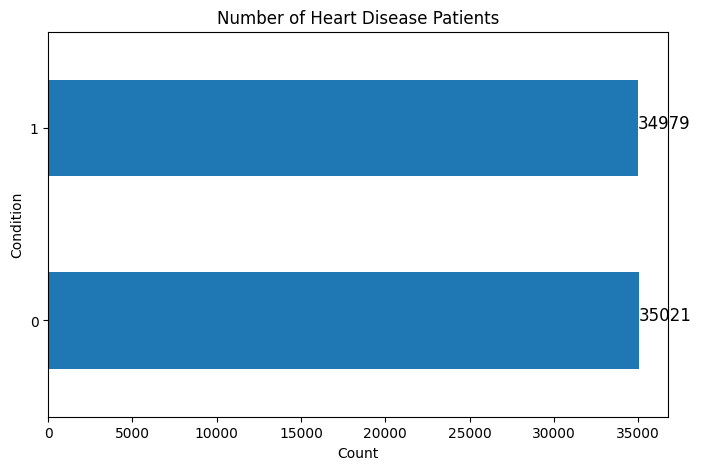

In [10]:


# Plot horizontal bar plot
plt.figure(figsize=(8, 5))
dt2['target'].value_counts().plot(kind="barh")
for i, j in enumerate(dt2['target'].value_counts().values):
    plt.text(j, i, str(j), fontsize=12)
plt.title('Number of Heart Disease Patients')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

In [11]:
dt2['target'].value_counts(normalize=True)

target
0    0.5003
1    0.4997
Name: proportion, dtype: float64

<Axes: >

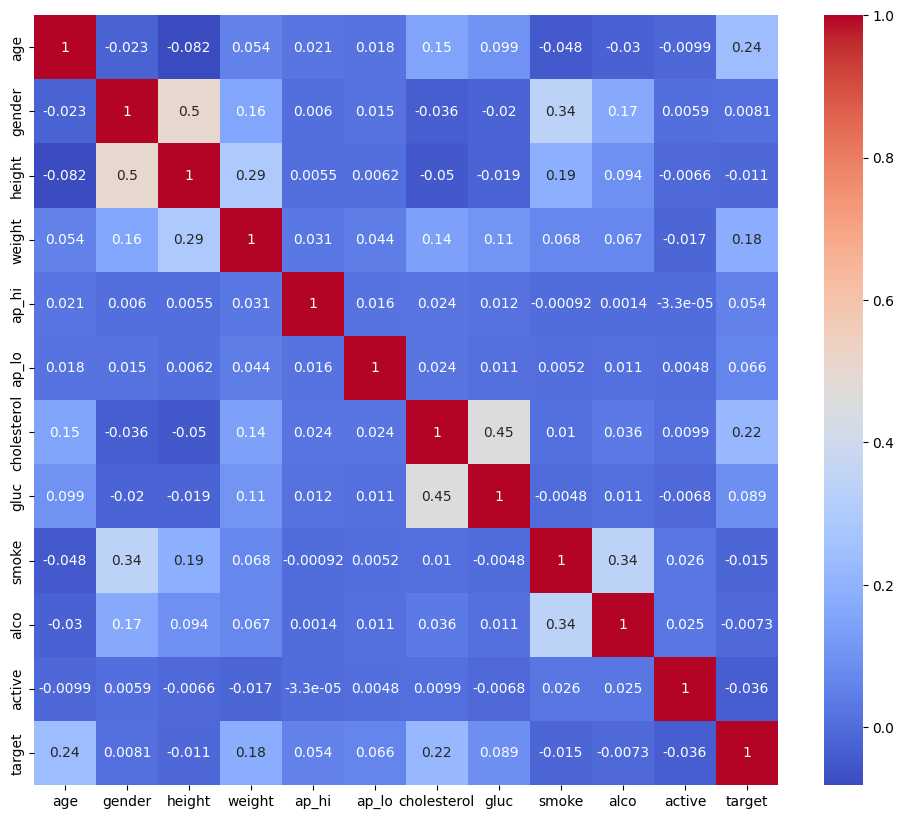

In [12]:
correlation_matrix = dt2.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


To check for outliers in your data, you can use the Interquartile Range (IQR) method. The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile). Any data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.



<h3 style="color: Red"> Outlier Check </h3>

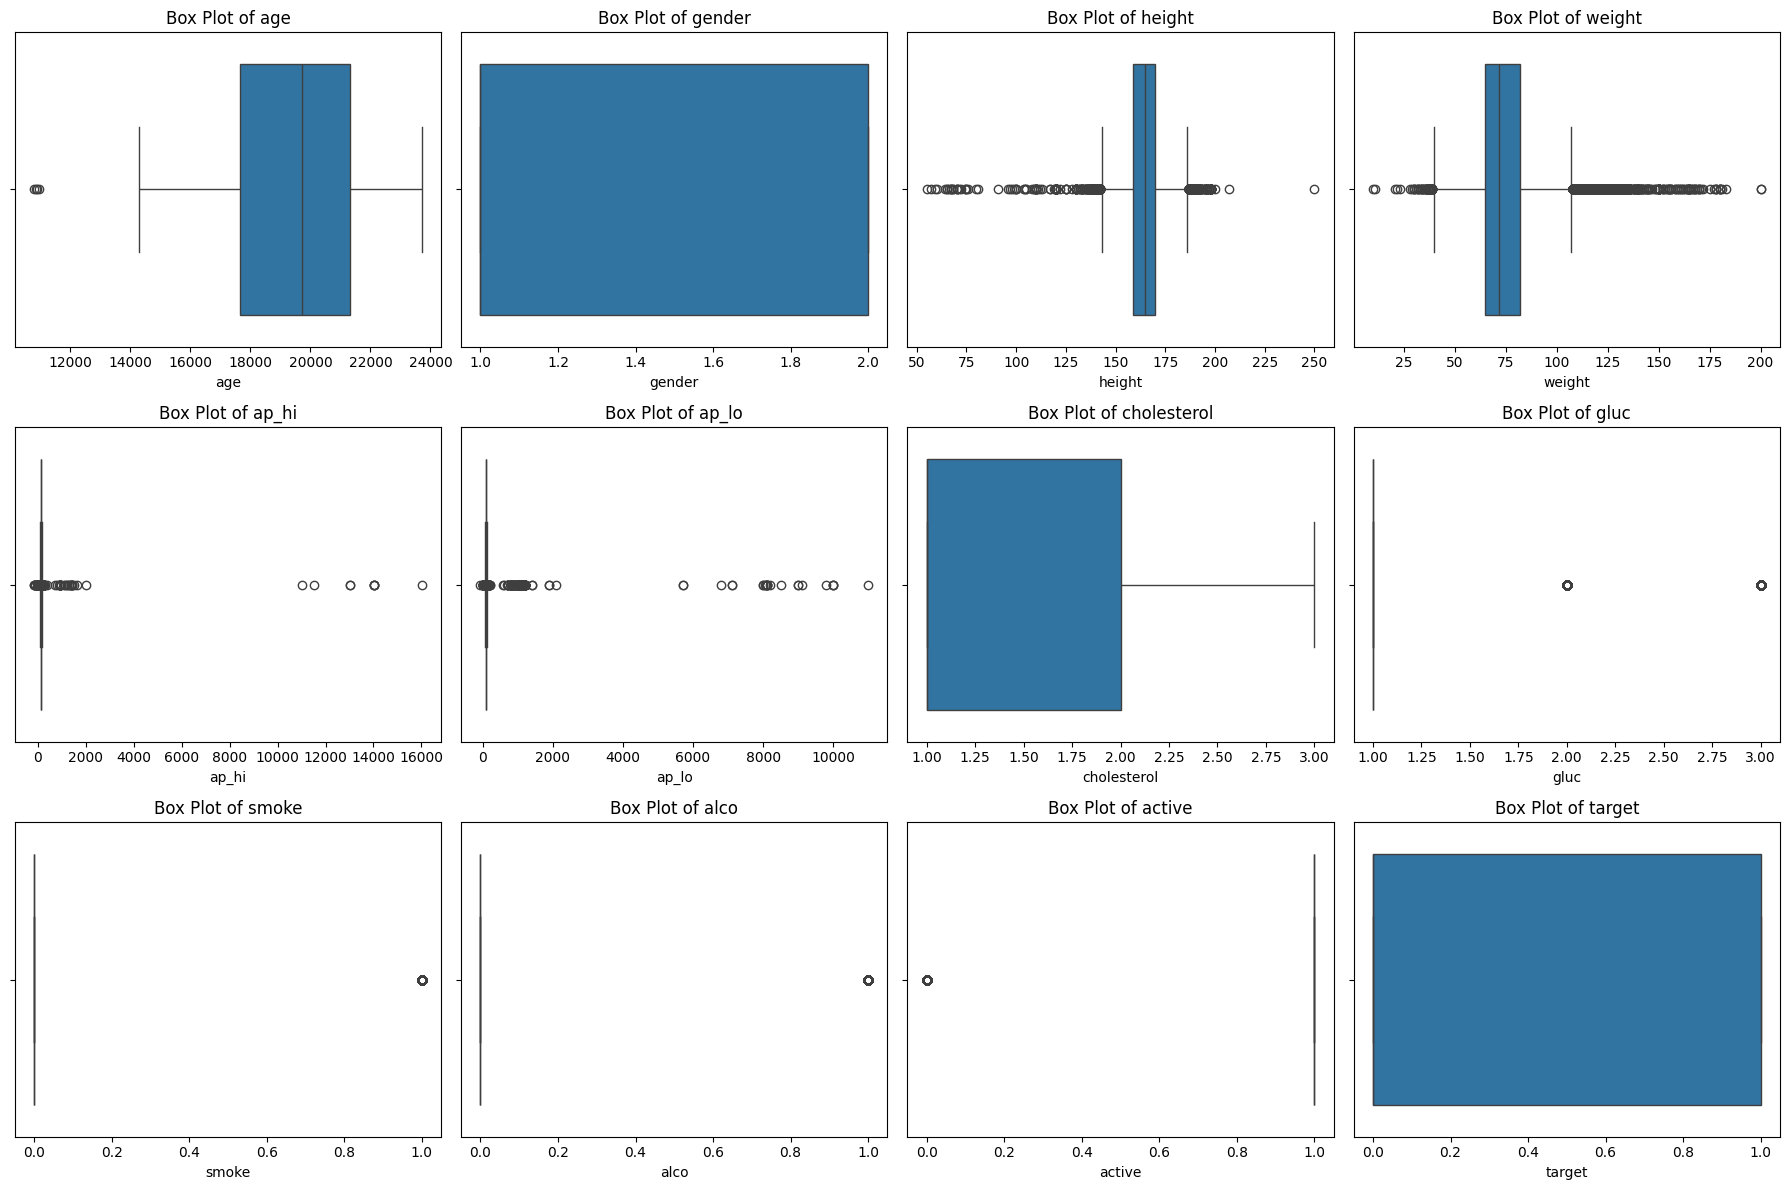

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each feature column and create box plots
for i, column in enumerate(dt2.columns):
    sns.boxplot(x=dt2[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
dt2.shape

(70000, 12)

In [15]:
dt2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0



<h3 style="color: Red"> Plot Each Feature</h3>

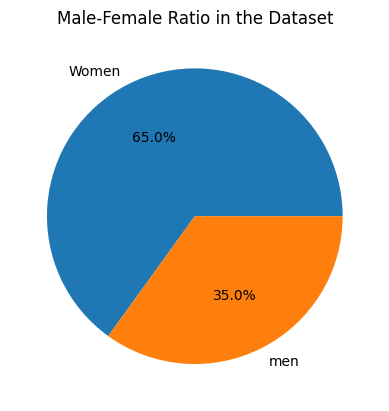

In [16]:
Women = dt2[dt2['gender'] == 1].shape[0]
men = dt2[dt2['gender'] == 2].shape[0]

# Create a pie plot
fig, ax = plt.subplots()
ax.pie([Women, men], labels=['Women', 'men'], autopct='%1.1f%%')
ax.set_title('Male-Female Ratio in the Dataset')
plt.show()

In [17]:
dt2.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'target'],
      dtype='object')

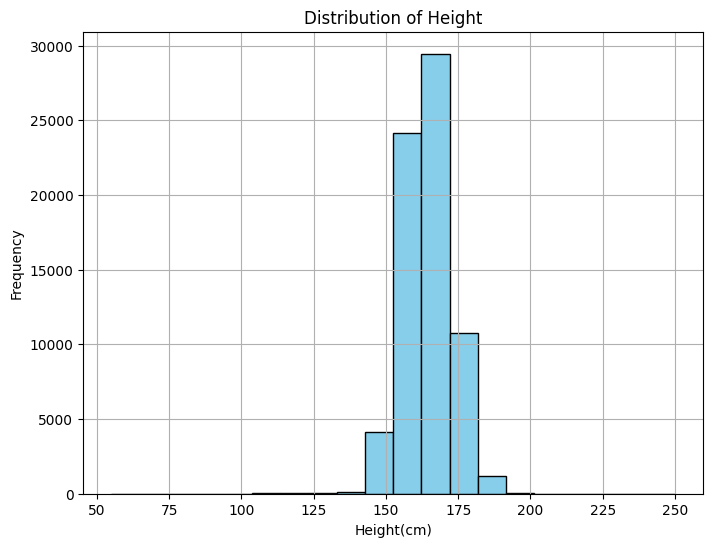

In [18]:
height = dt2['height']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(height, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Height')
plt.xlabel('Height(cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

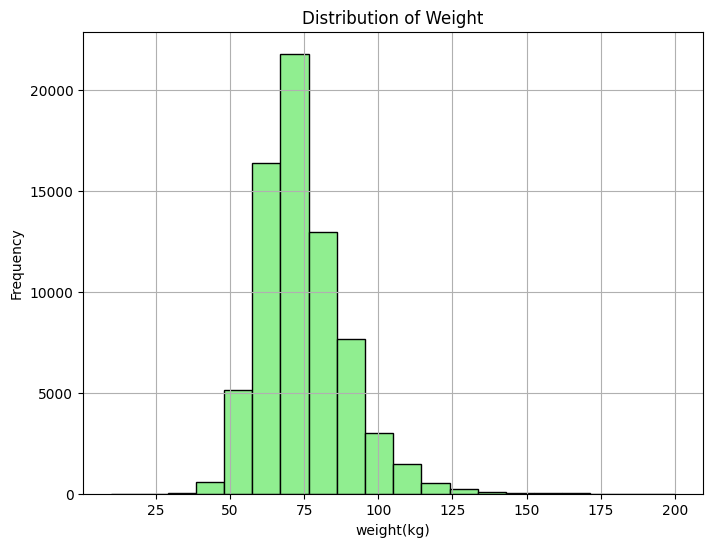

In [19]:
weight = dt2['weight']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(weight, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('weight(kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
ap_hi = dt2['ap_hi']
ap_hi

0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int64

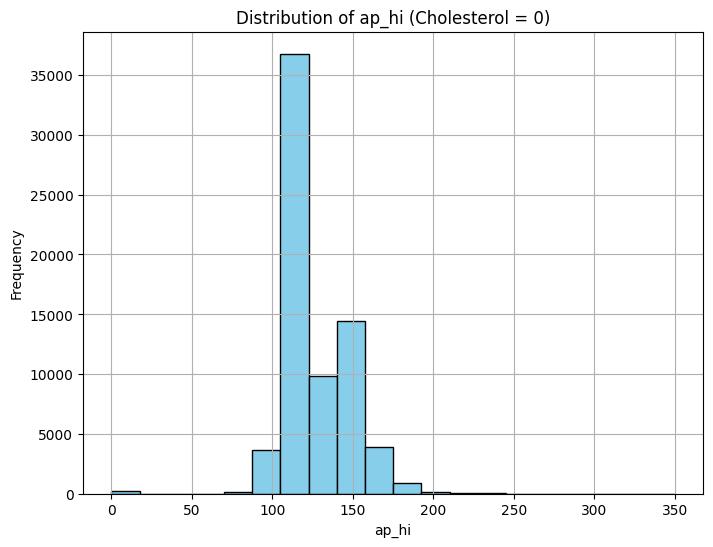

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(dt2['ap_hi'], bins=20, range=(0, 350), color='skyblue', edgecolor='black')
plt.title('Distribution of ap_hi (Cholesterol = 0)')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

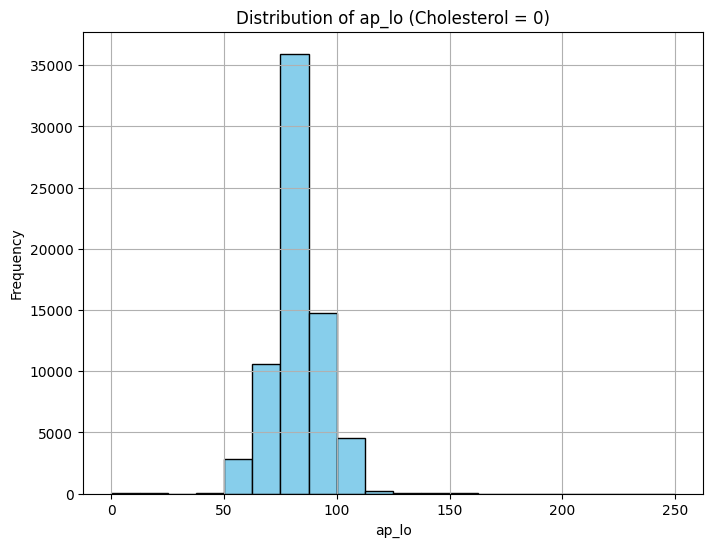

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(dt2['ap_lo'], bins=20, range=(0, 250), color='skyblue', edgecolor='black')
plt.title('Distribution of ap_lo (Cholesterol = 0)')
plt.xlabel('ap_lo')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
dt2.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'target'],
      dtype='object')

<span style="color:red">**cholesterol**</span>: 
   - Categorical variable representing cholesterol level.
     - 1: Normal
     - 2: Above Normal
     - 3: Well Above Normal


In [24]:
rows_with_zero_cholesterol = dt2[dt2['cholesterol'] == 0]
print(rows_with_zero_cholesterol.shape)
# Display the rows
print(rows_with_zero_cholesterol)


(0, 12)
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, target]
Index: []


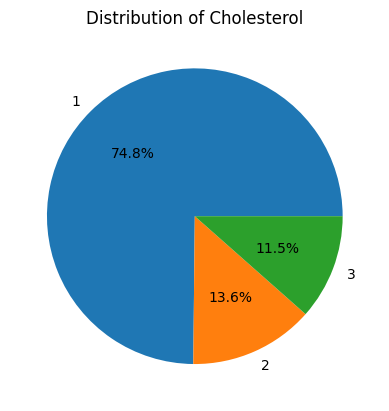

In [25]:
# cholesterol = dt2['cholesterol']

cholesterol_counts=dt2['cholesterol'].value_counts()
fig, ax = plt.subplots()
ax.pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Cholesterol')
plt.show()

In [26]:
dt2.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'target'],
      dtype='object')

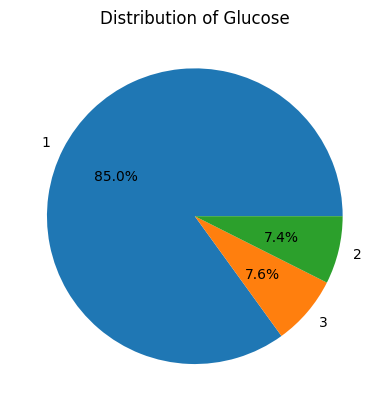

In [27]:
gluc = dt2['gluc']

gluc_counts = dt2['gluc'].value_counts()

# Create a pie plot
fig, ax = plt.subplots()
ax.pie(gluc_counts, labels=gluc_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Glucose')
plt.show()

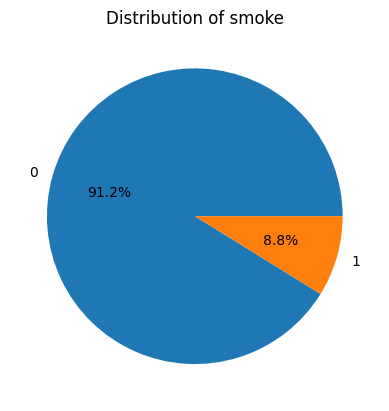

In [28]:

smoke_counts = dt2['smoke'].value_counts()

# Create a pie plot
fig, ax = plt.subplots()
ax.pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of smoke')
plt.show()

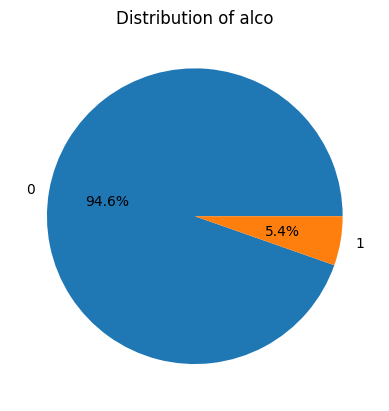

In [29]:

alco_counts = dt2['alco'].value_counts()

# Create a pie plot
fig, ax = plt.subplots()
ax.pie(alco_counts, labels=alco_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of alco')
plt.show()

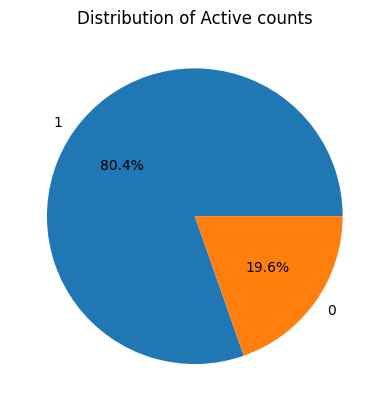

In [30]:


active_counts = dt2['active'].value_counts()

# Create a pie plot
fig, ax = plt.subplots()
ax.pie(active_counts, labels=active_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Active counts')
plt.show()

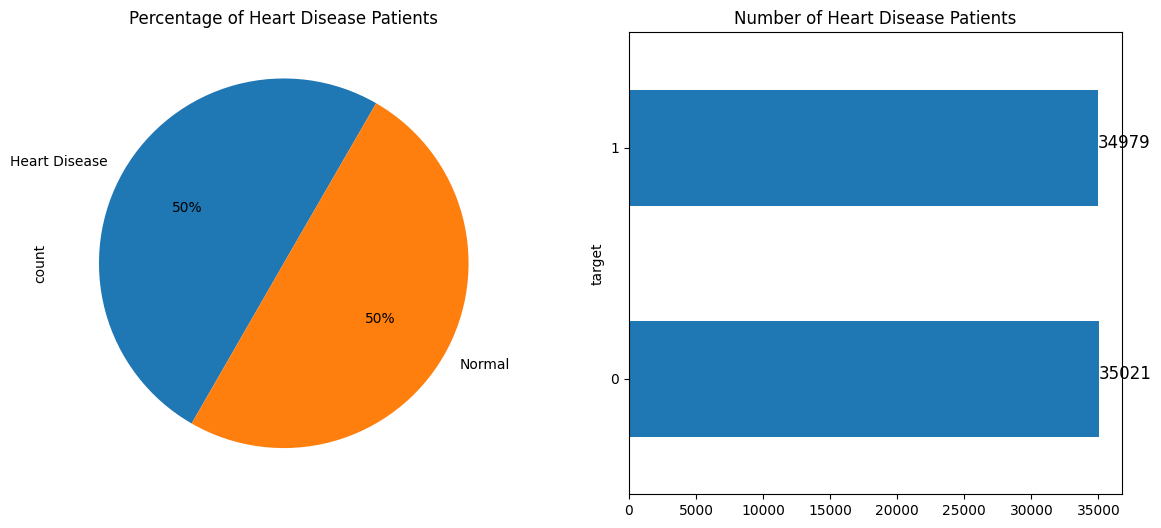

In [31]:

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot pie chart
dt2['target'].value_counts().plot.pie(ax=ax1, autopct="%1.0f%%", startangle=60, labels=["Heart Disease", "Normal"])
ax1.set(title='Percentage of Heart Disease Patients')

# Plot horizontal bar plot
dt2['target'].value_counts().plot(kind="barh", ax=ax2)
for i, j in enumerate(dt2['target'].value_counts().values):
    ax2.text(j, i, str(j), fontsize=12)
ax2.set(title='Number of Heart Disease Patients')

# Show the plot
plt.show()

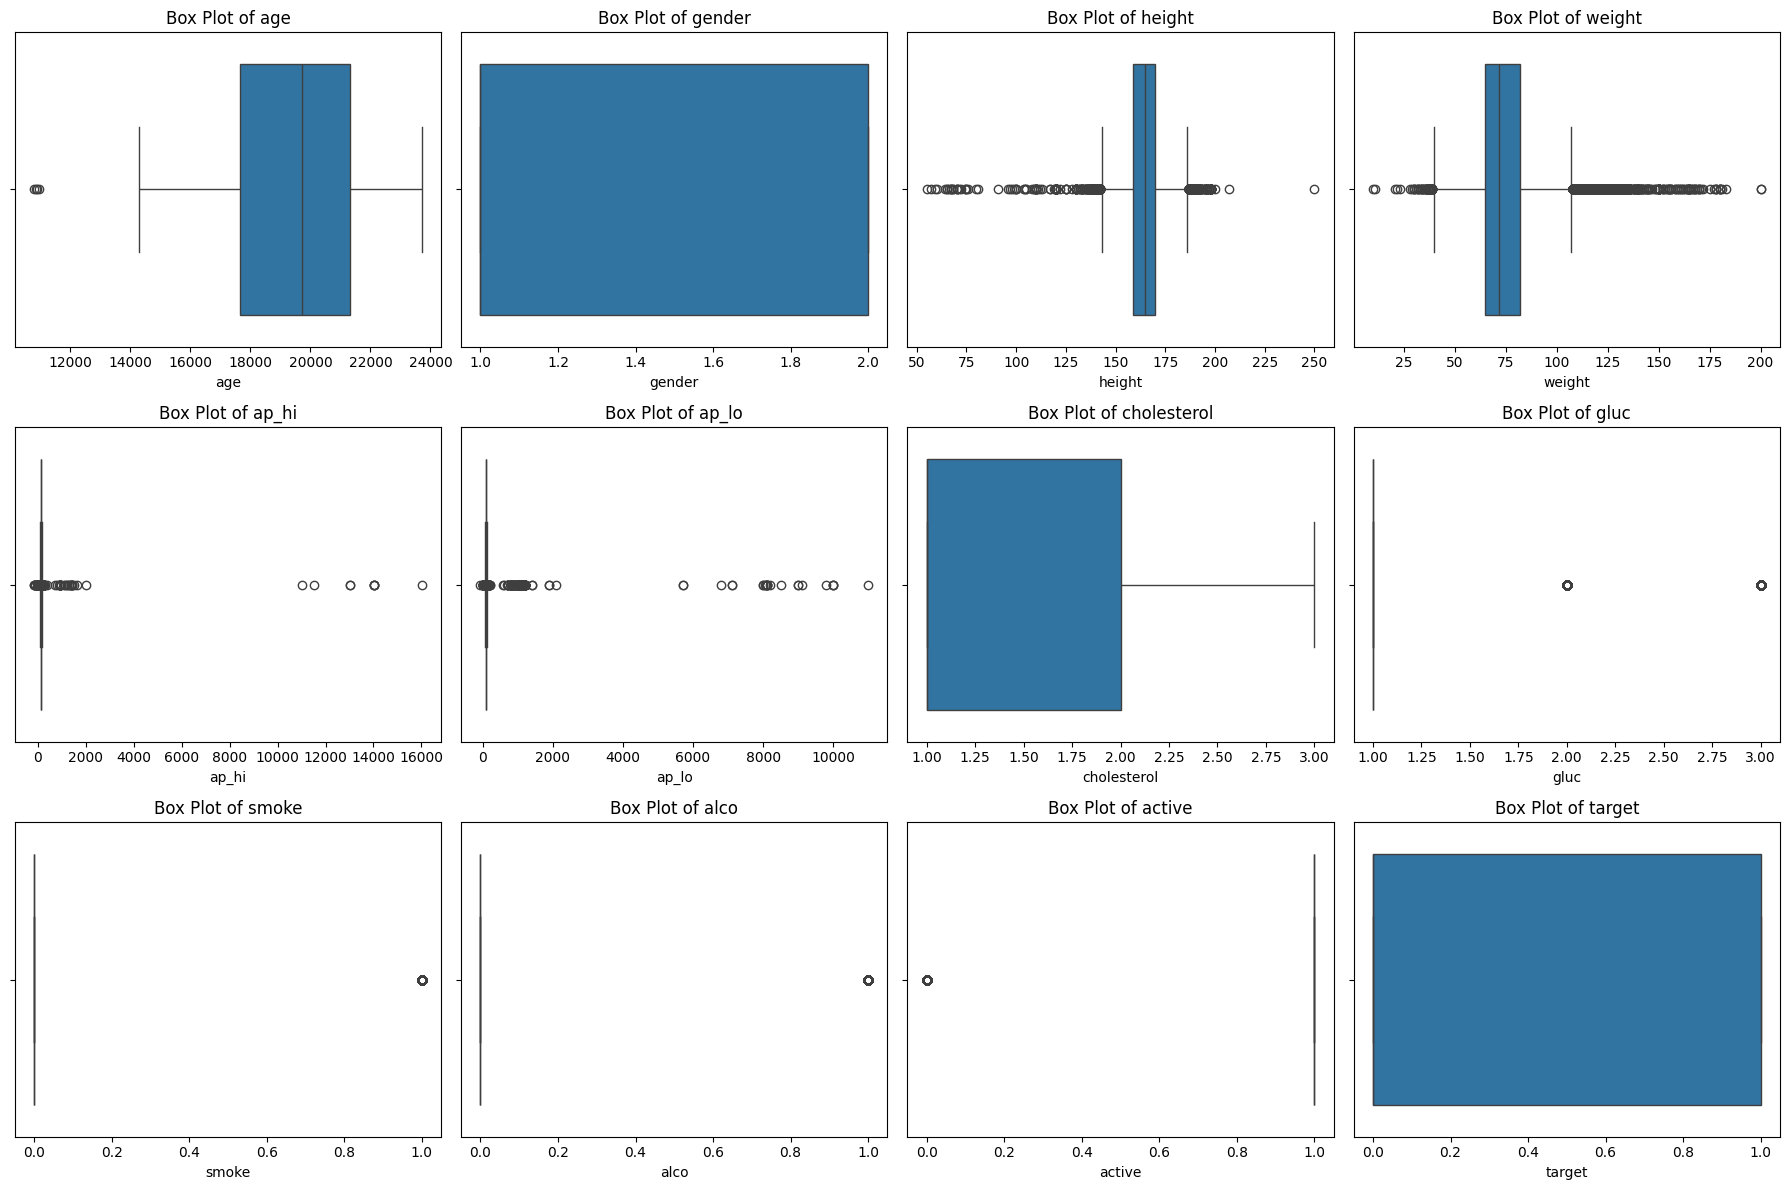

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each feature column and create box plots
for i, column in enumerate(dt2.columns):
    sns.boxplot(x=dt2[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()